In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [ ]:
# Load data from CSV file
#df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/ETHUSDT.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/ADAUSDT.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/BNBUSDT.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/VETUSDT.xlsx')
df = pd.read_excel('/content/drive/MyDrive/HK6/PTDLKD/đồ án/XMRUSDT.xlsx')
# Convert Close time column to date format
df["Close time"] = pd.to_datetime(df["Close time"], format="%d-%m-%Y")
# Sort data by Close time column
df = df.sort_values("Close time")
df = df[['Close','Close time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Close,Close time
0,52.28,2019-03-22
1,52.66,2019-03-23
2,52.67,2019-03-24
3,52.64,2019-03-25
4,51.21,2019-03-26
...,...,...
1495,162.00,2023-03-25
1496,159.70,2023-03-26
1497,161.50,2023-03-27
1498,151.70,2023-03-28


In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
df

,Close,Close time
0,52.28,2019-03-22
1,52.66,2019-03-23
2,52.67,2019-03-24
3,52.64,2019-03-25
4,51.21,2019-03-26
...,...,...
1495,162.00,2023-03-25
1496,159.70,2023-03-26
1497,161.50,2023-03-27
1498,151.70,2023-03-28


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [ ]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [ ]:
import pandas as pd

df['Close time'] = pd.to_datetime(df['Close time'])  # Chuyển đổi cột 'Close time' thành định dạng ngày tháng hợp lệ

last_index = df['Close time'].index[-1]  # Lấy index của ngày cuối cùng trong cột 'Close time'
last_date = df['Close time'].iloc[-1]  # Lấy ngày cuối cùng trong cột 'Close time'
date_range = pd.date_range(last_date, periods=31, freq='D', closed='right')  # Tạo chuỗi ngày cho 30 ngày tiếp theo

# Hiển thị kết quả
date_range
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[378.38307563 378.62516093 378.86724623 379.10933153 379.35141683
 379.59350213 379.83558743 380.07767273 380.31975802 380.56184332
 380.80392862 381.04601392 381.28809922 381.53018452 381.77226982
 382.01435512 382.25644042 382.49852571 382.74061101 382.98269631
 383.22478161 383.46686691 383.70895221 383.95103751 384.19312281
 384.4352081  384.6772934  384.9193787  385.161464   385.4035493 ]


<ipython-input-77-bdf1ebf0bf4e>:7: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.date_range(last_date, periods=31, freq='D', closed='right')  # Tạo chuỗi ngày cho 30 ngày tiếp theo


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 208.25592949323584
Testing RMSE: 144.76090373579902


Validation RMSE: 208.25592949323584
Testing RMSE: 144.76090373579902


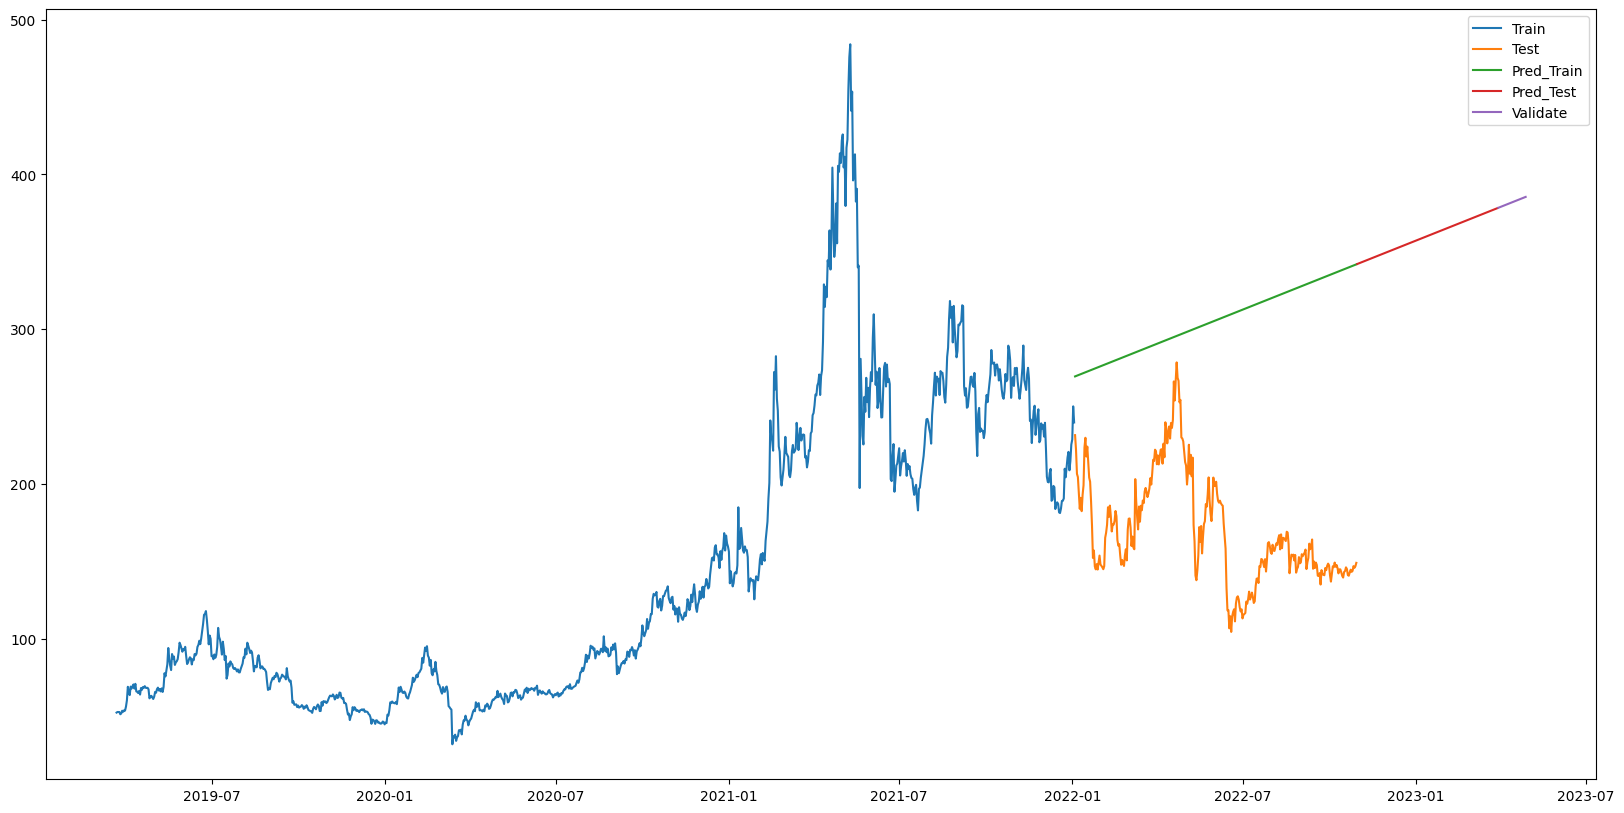

In [ ]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.subplots(figsize=(20,10))
plt.plot(train_data['Close time'], train_data['Close'])
plt.plot(test_data['Close time'], test_data['Close'])
#plt.plot(train_data['Close time'], y_pred_train)
plt.plot(test_data['Close time'], y_pred)
plt.plot(val_data['Close time'], y_pred_val)
plt.plot(date_range,y_next_30_days)
plt.legend(['Train', 'Test', 'Pred_Train', 'Pred_Test','Validate','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1050, stop=1350, step=1)

# Index

In [ ]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[378.38307563 378.62516093 378.86724623 379.10933153 379.35141683
 379.59350213 379.83558743 380.07767273 380.31975802 380.56184332
 380.80392862 381.04601392 381.28809922 381.53018452 381.77226982
 382.01435512 382.25644042 382.49852571 382.74061101 382.98269631
 383.22478161 383.46686691 383.70895221 383.95103751 384.19312281
 384.4352081  384.6772934  384.9193787  385.161464   385.4035493 ]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 208.25592949323584
Testing RMSE: 144.76090373579902


Validation RMSE: 208.25592949323584
Testing RMSE: 144.76090373579902


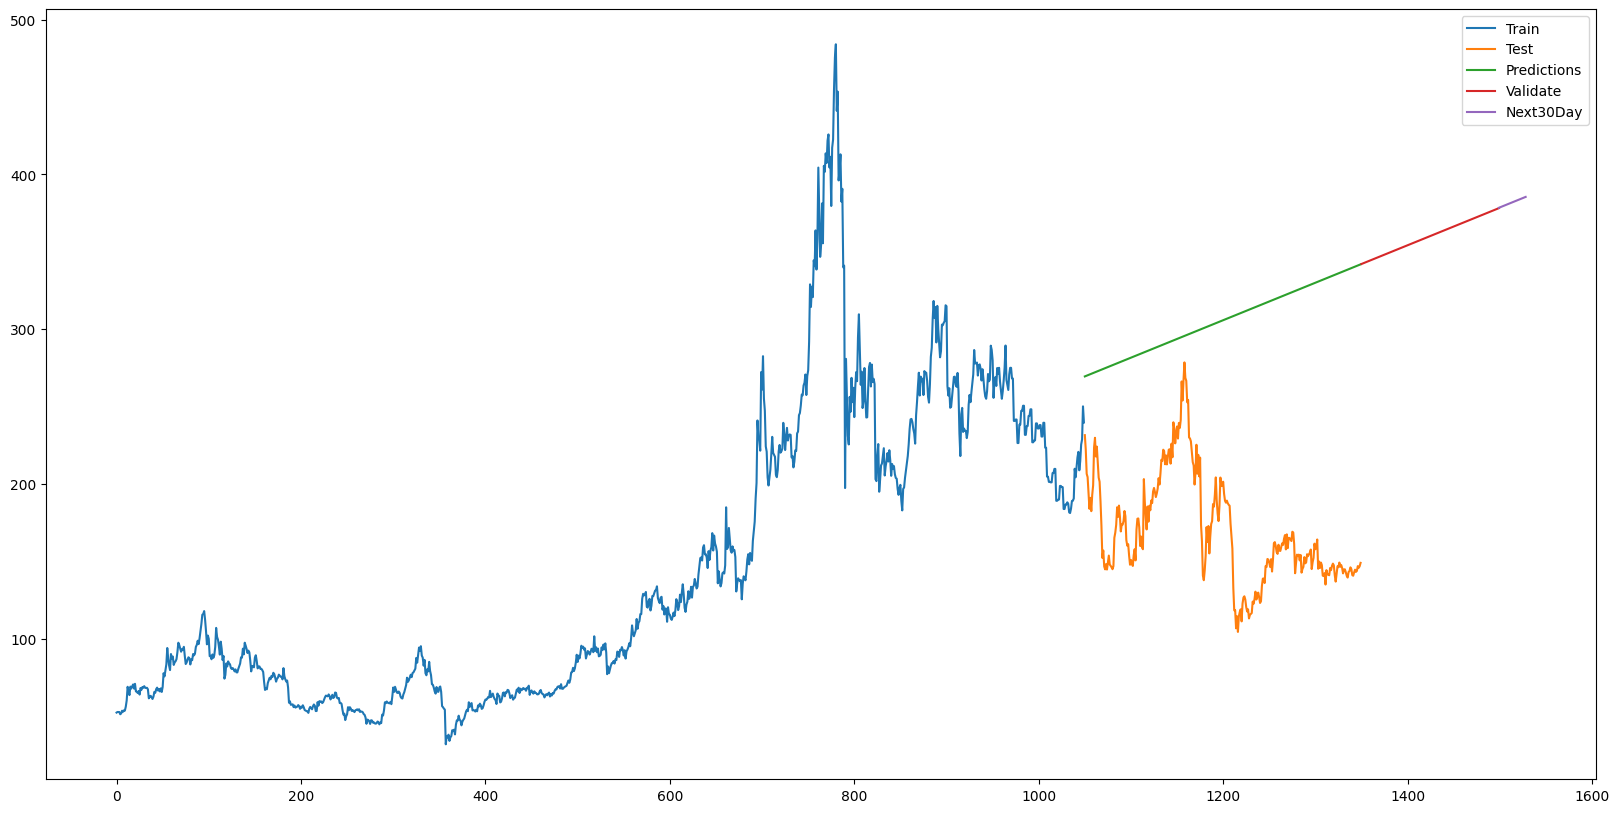

In [ ]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.subplots(figsize=(20,10))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1050, stop=1350, step=1)